<a href="https://colab.research.google.com/github/Kanonskud/Data-Exam/blob/main/Momentum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 5.5MB 22.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=d1c448e80f4260a15ac71242bfd0e3e6f200a1d8418b7671ea87e42b7a971eb6
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 

--2021-01-21 10:29:46--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-01-21 10:29:46--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-01-21 10:29:47--  https://pilotfiber.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving pilotfiber

In [3]:
!ls

sample_data  ta-lib-0.4.0-src.tar.gz


In [4]:
!tar xvzf ta-lib-0.4.0-src.tar.gz

ta-lib/
ta-lib/config.sub
ta-lib/aclocal.m4
ta-lib/CHANGELOG.TXT
ta-lib/include/
ta-lib/include/ta_abstract.h
ta-lib/include/ta_func.h
ta-lib/include/ta_common.h
ta-lib/include/ta_config.h.in
ta-lib/include/Makefile.am
ta-lib/include/ta_libc.h
ta-lib/include/ta_defs.h
ta-lib/missing
ta-lib/ta-lib.spec.in
ta-lib/config.guess
ta-lib/Makefile.in
ta-lib/ta-lib.dpkg.in
ta-lib/Makefile.am
ta-lib/autogen.sh
ta-lib/install-sh
ta-lib/configure
ta-lib/depcomp
ta-lib/HISTORY.TXT
ta-lib/configure.in
ta-lib/autom4te.cache/
ta-lib/autom4te.cache/output.0
ta-lib/autom4te.cache/requests
ta-lib/autom4te.cache/output.1
ta-lib/autom4te.cache/traces.0
ta-lib/autom4te.cache/traces.1
ta-lib/ltmain.sh
ta-lib/ta-lib-config.in
ta-lib/src/
ta-lib/src/ta_func/
ta-lib/src/ta_func/ta_MACDFIX.c
ta-lib/src/ta_func/ta_CDLPIERCING.c
ta-lib/src/ta_func/ta_DIV.c
ta-lib/src/ta_func/ta_ROCR100.c
ta-lib/src/ta_func/ta_ADXR.c
ta-lib/src/ta_func/ta_MAVP.c
ta-lib/src/ta_func/ta_CDLCLOSINGMARUBOZU.c
ta-lib/src/ta_func/ta_COSH.

In [5]:
import os

In [6]:
os.chdir('ta-lib') # Can't use !cd in co-lab

In [ ]:
!./configure --prefix=/usr

In [ ]:
!make

In [ ]:
!make install

In [10]:
os.chdir('../')

In [11]:
!ls

sample_data  ta-lib  ta-lib-0.4.0-src.tar.gz


In [ ]:
!pip install TA-Lib

In [ ]:
pip install git+https://github.com/quantopian/pyfolio

In [ ]:
pip install backtrader

In [1]:

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import random
import pandas as pd
from pandas_datareader import data as pdr 
#import pandas as pdr
#%matplotlib inline
from scipy import stats
from scipy.stats import norm, t
from matplotlib import style
import bs4 as bs
import requests
import datetime
import pyfolio as pf
import pytz
from os import listdir

/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [194]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', "") for s in tickers]
tickers = tickers[:100]
start = "2017-01-01"
end = "2019-07-07"
data=yf.download(tickers, start=start, end=end)
stock = pd.DataFrame(data['Adj Close'])
stock.rename(columns = {'Adj Close':ticker}, inplace=True)
stock.head(2)
spy = yf.download('^GSPC', start=start, end=end)

[*********************100%***********************]  100 of 100 completed

3 Failed downloads:
- CARR: Data doesn't exist for startDate = 1483228800, endDate = 1562457600
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted
[*********************100%***********************]  1 of 1 completed


In [196]:
stock = stock.dropna(how='all')

In [199]:
stock['AMD']

Date
2017-01-03    11.430000
2017-01-04    11.430000
2017-01-05    11.240000
2017-01-06    11.320000
2017-01-09    11.490000
                ...    
2019-06-28    30.370001
2019-07-01    31.200001
2019-07-02    31.240000
2019-07-03    31.190001
2019-07-05    31.500000
Name: AMD, Length: 630, dtype: float64

In [200]:
from scipy.stats import linregress
def momentum(closes):
    returns = np.log(closes)
    x = np.arange(len(returns))
    slope, _, rvalue, _, _ = linregress(x, returns)
    return ((1 + slope) ** 252) * (rvalue ** 2)  # annualize slope and multiply by R^2

In [201]:
momentums = stock.copy(deep=True)
for ticker in tickers:
    momentums[ticker] = stock[ticker].rolling(90).apply(momentum, raw=False)

In [202]:
import backtrader as bt

class Momentum(bt.Indicator):
    lines = ('trend',)
    params = (('period', 90),)
    
    def __init__(self):
        self.addminperiod(self.params.period)
    
    def next(self):
        returns = np.log(self.data.get(size=self.p.period))
        x = np.arange(len(returns))
        slope, _, rvalue, _, _ = linregress(x, returns)
        annualized = (1 + slope) ** 252
        self.lines.trend[0] = annualized * (rvalue ** 2)
        
        
class Strategy(bt.Strategy):
    def __init__(self):
        self.i = 0
        self.inds = {}
        self.spy = self.datas[0]
        self.stocks = self.datas[1:]
        
        self.spy_sma200 = bt.indicators.SimpleMovingAverage(self.spy.close,
                                                            period=200)
        for d in self.stocks:
            self.inds[d] = {}
            self.inds[d]["momentum"] = Momentum(d.close, 
                                                period=90)
            self.inds[d]["sma100"] = bt.indicators.SimpleMovingAverage(d.close, 
                                                                       period=100)
            self.inds[d]["atr20"] = bt.indicators.ATR(d, 
                                                      period=20)

    def prenext(self):
        # call next() even when data is not available for all tickers
        self.next()
    
    def next(self):
        if self.i % 5 == 0:
            self.rebalance_portfolio()
        if self.i % 10 == 0:
            self.rebalance_positions()
        self.i += 1
    
    def rebalance_portfolio(self):
        # only look at data that we can have indicators for 
        self.rankings = list(filter(lambda d: len(d) > 100, self.stocks))
        self.rankings.sort(key=lambda d: self.inds[d]["momentum"][0])
        num_stocks = len(self.rankings)
        
        # sell stocks based on criteria
        for i, d in enumerate(self.rankings):
            if self.getposition(self.data).size:
                if i > num_stocks * 0.2 or d < self.inds[d]["sma100"]:
                    self.close(d)
        
        if self.spy < self.spy_sma200:
            return
        
        # buy stocks with remaining cash
        for i, d in enumerate(self.rankings[:int(num_stocks * 0.2)]):
            cash = self.broker.get_cash()
            value = self.broker.get_value()
            if cash <= 0:
                break
            if not self.getposition(self.data).size:
                size = value * 0.001 / self.inds[d]["atr20"]
                self.buy(d, size=size)
                
        
    def rebalance_positions(self):
        num_stocks = len(self.rankings)
        
        if self.spy < self.spy_sma200:
            return

        # rebalance all stocks
        for i, d in enumerate(self.rankings[:int(num_stocks * 0.2)]):
            cash = self.broker.get_cash()
            value = self.broker.get_value()
            if cash <= 0:
                break
            size = value * 0.001 / self.inds[d]["atr20"]
            self.order_target_size(d, size)

In [203]:
cerebro = bt.Cerebro(stdstats=False)

In [204]:
cerebro.adddata(bt.feeds.PandasData(dataname=spy))

In [205]:
for i in tickers:
    data1=yf.download(i, start=start, end=end)
    
    if len(data1) > 100: 
        cerebro.adddata(bt.feeds.PandasData(dataname=data1))
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [206]:

cerebro.broker.set_coc(True)



cerebro.addobserver(bt.observers.Value)
cerebro.addanalyzer(bt.analyzers.SharpeRatio, riskfreerate=0.0)
cerebro.addanalyzer(bt.analyzers.Returns)
cerebro.addanalyzer(bt.analyzers.DrawDown)
cerebro.addanalyzer(bt.analyzers.PyFolio, _name='pyfolio')
cerebro.addstrategy(Strategy)
results = cerebro.run()

In [207]:
cerebro.broker.getvalue()

13268.123662915941

In [208]:

print(f"Sharpe: {results[0].analyzers.sharperatio.get_analysis()['sharperatio']:.3f}")
print(f"Norm. Annual Return: {results[0].analyzers.returns.get_analysis()['rnorm100']:.2f}%")
print(f"Max Drawdown: {results[0].analyzers.drawdown.get_analysis()['max']['drawdown']:.2f}%")

Sharpe: 0.907
Norm. Annual Return: 11.94%
Max Drawdown: 18.43%


In [209]:
strat = results[0]

pyfoliozer = strat.analyzers.getbyname('pyfolio')
returns, positions, transactions, gross_lev = pyfoliozer.get_pf_items()
returns.name = 'Strategy'
returns.head(2)

index
2017-01-03 00:00:00+00:00    0.0
2017-01-04 00:00:00+00:00    0.0
Name: Strategy, dtype: float64

In [217]:
returns.dropna(inplace=True)

In [220]:
returns=returns[1:]

In [210]:
pf.show_perf_stats(returns)

Start date,2017-01-03
End date,2019-07-05
Total months,30
,Backtest
Annual return,11.542%
Cumulative returns,31.513%
Annual volatility,13.238%
Sharpe ratio,0.90
Calmar ratio,0.63
Stability,0.80
Max drawdown,-18.434%


In [211]:
spy_returns = pd.DataFrame(spy['Adj Close'])
spy_returns.rename(columns = {'Adj Close':'^GSPC'}, inplace=True)
spy_returns['returns'] = np.log(spy_returns / spy_returns.shift(1))
spy_returns.dropna(inplace=True)

In [212]:
benchmark_rets= spy_returns['returns']
benchmark_rets.index = benchmark_rets.index.tz_localize('UTC') 
benchmark_rets = benchmark_rets.filter(returns.index)
benchmark_rets.name = 'SPY-500'
benchmark_rets.head(2)

Date
2017-01-04 00:00:00+00:00    0.005706
2017-01-05 00:00:00+00:00   -0.000771
Name: SPY-500, dtype: float64

In [213]:
benchmark_rets

Date
2017-01-04 00:00:00+00:00    0.005706
2017-01-05 00:00:00+00:00   -0.000771
2017-01-06 00:00:00+00:00    0.003511
2017-01-09 00:00:00+00:00   -0.003555
2017-01-10 00:00:00+00:00    0.000000
                               ...   
2019-06-28 00:00:00+00:00    0.005741
2019-07-01 00:00:00+00:00    0.007643
2019-07-02 00:00:00+00:00    0.002924
2019-07-03 00:00:00+00:00    0.007643
2019-07-05 00:00:00+00:00   -0.001808
Name: SPY-500, Length: 629, dtype: float64

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)


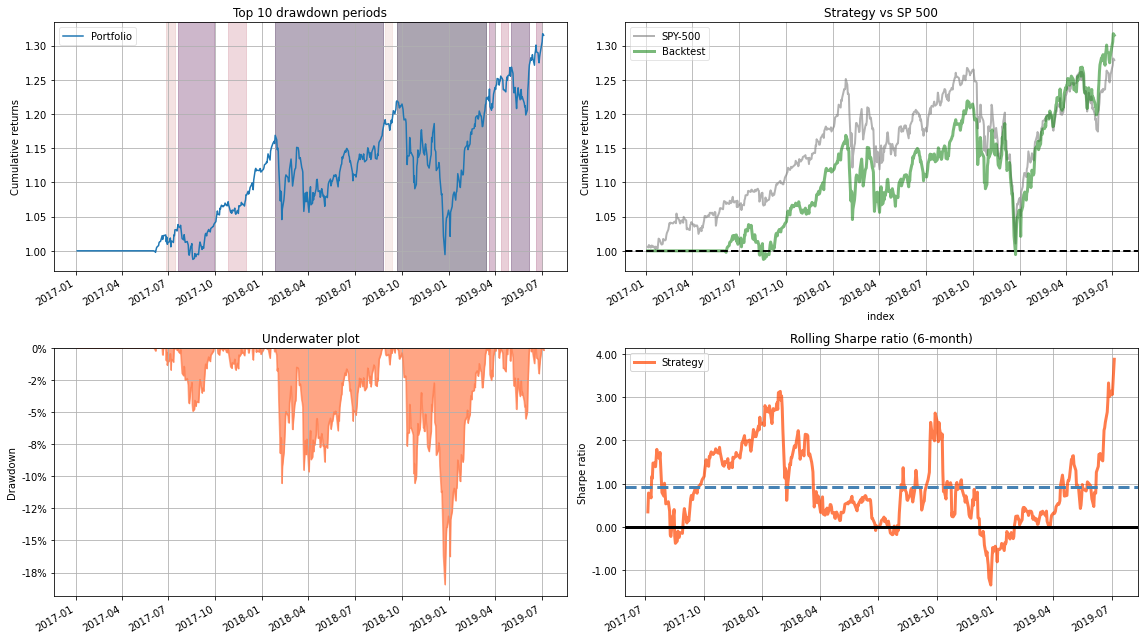

In [221]:
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_drawdown_periods(returns=returns, ax=axes[0])
axes[0].grid(True)
pf.plot_rolling_returns(returns=returns,
                        factor_returns=benchmark_rets,
                        ax=axes[1], title='Strategy vs SP 500')
axes[1].grid(True)
pf.plot_drawdown_underwater(returns=returns, ax=axes[2])
axes[2].grid(True)
pf.plot_rolling_sharpe(returns=returns, ax=axes[3])
axes[3].grid(True)
# fig.suptitle('Strategy vs Nifty-50 (Buy and Hold)', fontsize=16, y=0.990)

plt.grid(True)
plt.legend()
plt.tight_layout()

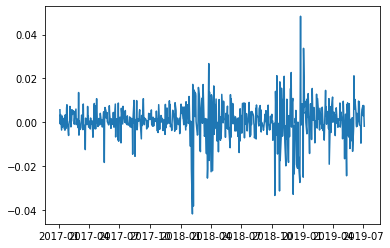

In [41]:
plt.plot(benchmark_rets)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:21: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.subplots_adjust(bottom=0.2)


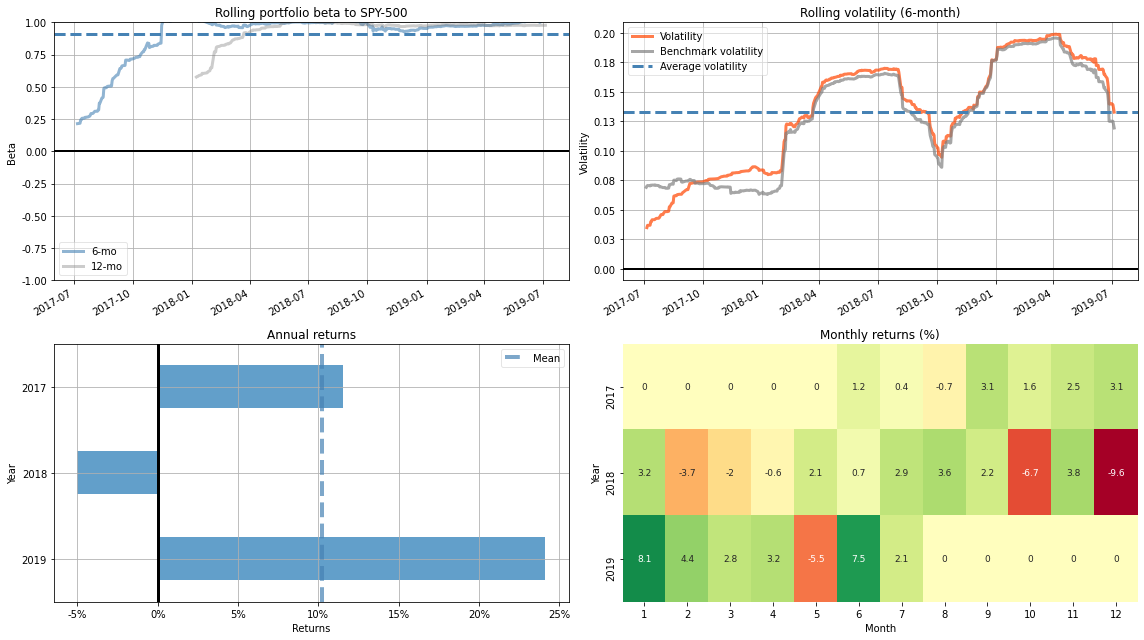

In [222]:
# plot performance for strategy vs benchmark
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 9),constrained_layout=True)
axes = ax.flatten()

pf.plot_rolling_beta(returns=returns, factor_returns=benchmark_rets, ax=axes[0])
axes[0].grid(True)

pf.plot_rolling_volatility(returns=returns, factor_returns=benchmark_rets,ax=axes[1])
axes[1].grid(True)

pf.plot_annual_returns(returns=returns, ax=axes[2])
axes[2].grid(True)

pf.plot_monthly_returns_heatmap(returns=returns, ax=axes[3],)
# fig.suptitle('BL Portfolio vs BSE-SENSEX - 2', fontsize=16, y=1.0)


plt.tight_layout()